In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plot
import seaborn

In [9]:
outputPath = 'D:/Localization_SimulatedData-master/Localization_v_2_0/gitUpload_160_side'
trainSetCoordsPath = 'D:/Localization_SimulatedData-master/Localization_v_2_0/gitUpload_160_side/coordinates_train.txt'
testSetCoordsPath = 'D:/Localization_SimulatedData-master/Localization_v_2_0/gitUpload_160_side/coordinates_test.txt'
m_id = '160'
train_test_data = True
test_160 = 'D:/Localization_SimulatedData-master/Localization_v_2_0/gitUpload_160_side/result_test.csv'
train_160 = 'D:/Localization_SimulatedData-master/Localization_v_2_0/gitUpload_160_side/result_train.csv'


In [5]:
detectionResultsTrainSet = pd.read_csv (trainSetCSV)
data = detectionResultsTrainSet[[m_id + '_bb_x1' , m_id + '_bb_y1' , m_id + '_bb_x2' , m_id + '_bb_y2' , m_id + '_bb_x3' , m_id + '_bb_y3' , m_id +
      '_bb_x4' , m_id + '_bb_y4']].values
	  
dataset = pd.DataFrame({'x1': data[:, 0],'y1': data[:, 1],'x2': data[:, 2],'y2': data[:, 3],'x3': data[:, 4],'y3': data[:, 5],'x4': data[:, 6],'y4': data[:, 7]})
dataset
dataset['C'] = np.arange(len(dataset))
dataset['total_sum'] = dataset[["x1", "y1", "x2","y2","x3", "y3", "x4","y4"]].sum(axis=1)
dataset.loc[dataset['total_sum']>0,'bool']=1
dataset['cum_sum'] = dataset['bool'].cumsum()
dataset

,x1,y1,x2,y2,x3,y3,x4,y4,C,total_sum,bool,cum_sum
0,2002.74,837.724,1860.01,774.866,1961.01,624.575,2116.96,721.433,0,10899.318,1.0,1.0
1,2002.82,837.876,1860.12,774.979,1961.15,624.730,2116.99,721.628,1,10900.293,1.0,2.0
2,2002.80,837.833,1860.14,774.946,1961.20,624.695,2117.02,721.628,2,10900.262,1.0,3.0
3,2002.92,837.964,1860.11,775.037,1961.29,624.745,2116.88,721.676,3,10900.622,1.0,4.0
4,2002.96,837.934,1860.17,775.136,1961.25,624.773,2116.89,721.680,4,10900.793,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
901,2009.45,845.611,1867.38,781.080,1970.38,631.866,2125.07,730.736,901,10961.573,1.0,844.0
902,2009.12,846.252,1867.05,781.561,1970.16,632.499,2124.58,731.383,902,10962.605,1.0,845.0
903,2009.65,846.171,1867.44,781.655,1970.68,632.529,2125.14,731.397,903,10964.662,1.0,846.0
904,2009.56,846.318,1867.59,781.596,1970.57,632.666,2125.26,731.436,904,10964.996,1.0,847.0


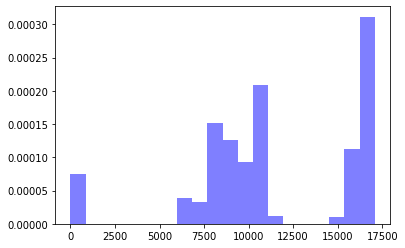

In [6]:
plt.hist(dataset['total_sum'], 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

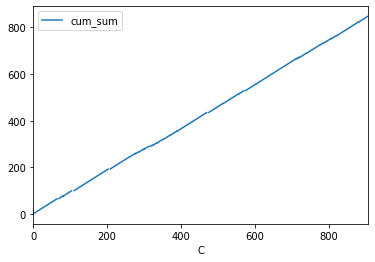

In [7]:
dataset.plot( x='C', y='cum_sum')